In [14]:
!pip install scikit-learn

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9.3/9.3 MB 31.2 MB/s eta 0:00:00m eta 0:00:010:01:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 25.1/25.1 MB 18.5 MB/s eta 0:00:00m eta 0:00:010:01:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 308.4/308.4 kB 9.5 MB/s eta 0:00:00m eta 0:00:01

[notice] A new release of pip is available: 23.0.1 -> 25.3
[notice] To update, run: pip install --upgrade pip


In [16]:
# Basic imports
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras import layers, models
from tensorflow.keras.optimizers import Adam

Raw shapes: (60000, 28, 28) (60000,) (10000, 28, 28) (10000,)
Processed shapes: (60000, 28, 28) (60000,) (10000, 28, 28) (10000,)


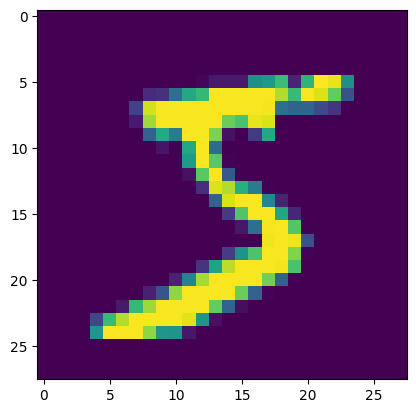

In [3]:
from tensorflow.keras.datasets import mnist

# 1) Load data
(x_train, y_train), (x_test, y_test) = mnist.load_data()
print("Raw shapes:", x_train.shape, y_train.shape, x_test.shape, y_test.shape)

# 2) Scale to [0,1]
x_train = x_train / 255.0
x_test  = x_test / 255.0

print("Processed shapes:", x_train.shape, y_train.shape, x_test.shape, y_test.shape)

# (Optional) quick peek
plt.imshow(x_train[0])
plt.show()

In [31]:
# Build a small, easy-to-understand CNN
model_cnn = models.Sequential([
    layers.Input(shape=(28,28,1)),
    layers.Conv2D(32, (3,3), activation="relu", padding="same"),
    layers.MaxPool2D((2,2)),
    layers.Conv2D(64, (3,3), activation="relu", padding="same"),
    layers.MaxPool2D((2,2)),
    layers.Flatten(),
    layers.Dense(128, activation="relu"),
    layers.Dense(10, activation="softmax")
])

model_cnn.summary()

Model: "sequential_8"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_14 (Conv2D)              │ (None, 28, 28, 32)     │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_14 (MaxPooling2D) │ (None, 14, 14, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_15 (Conv2D)              │ (None, 14, 14, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_15 (MaxPooling2D) │ (None, 7, 7, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_8 (Flatten)             │ (None, 3136)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_16 (Dense)                │ (None, 128)            │       401,536 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_17 (Dense)                │ (None, 10)             │         1,290 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 421,642 (1.61 MB)

 Trainable params: 421,642 (1.61 MB)

 Non-trainable params: 0 (0.00 B)

In [30]:
# Compile and train (Adam is simple and works well)
optimizer = Adam(learning_rate=0.01)
model_cnn.compile(optimizer=optimizer,
                  loss='sparse_categorical_crossentropy',
                  metrics=['accuracy'])

history_cnn = model_cnn.fit(
    x_train, y_train,
    epochs=1,            # you can increase later
    batch_size=128,
    validation_data=(x_test, y_test)
)


469/469 ━━━━━━━━━━━━━━━━━━━━ 79s 166ms/step - accuracy: 0.9451 - loss: 0.1800 - val_accuracy: 0.9801 - val_loss: 0.0600


313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.9821 - loss: 0.0578
[CNN] Test accuracy: 0.9821000099182129 | Test loss: 0.057824309915304184
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step
Confusion matrix (first 5 rows):
 [[ 968    0    1    0    0    3    2    3    3    0]
 [   0 1133    1    0    0    0    0    0    1    0]
 [   1   10  993   11    1    0    0   15    1    0]
 [   0    0    1  999    0    5    0    3    2    0]
 [   1    4    1    0  972    0    0    1    1    2]]
              precision    recall  f1-score   support

           0       0.99      0.99      0.99       980
           1       0.97      1.00      0.98      1135
           2       0.99      0.96      0.97      1032
           3       0.98      0.99      0.98      1010
           4       0.98      0.99      0.99       982
           5       0.98      0.99      0.98       892
           6       0.99      0.98      0.99       958
           7       0.96      0.99      0.97      1028
           8       0.99

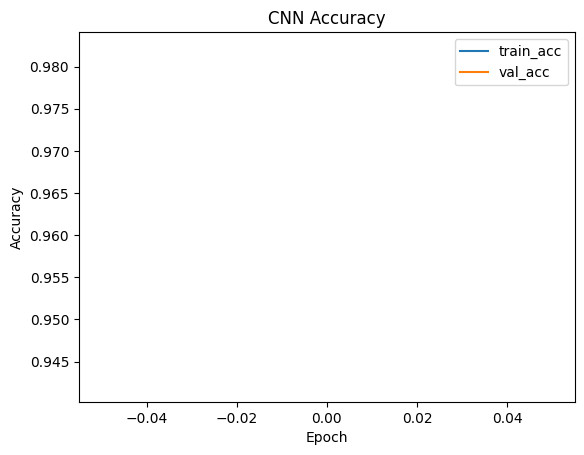

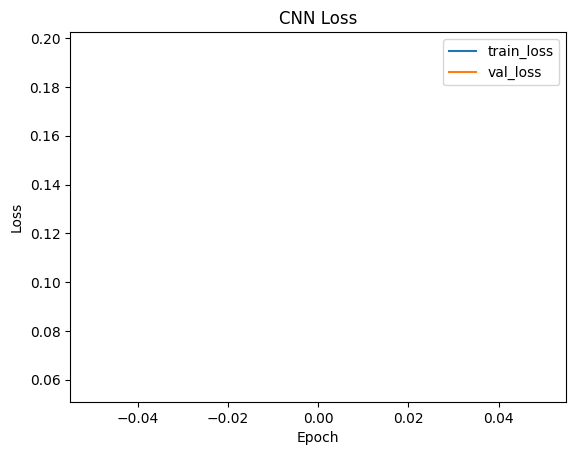

In [15]:
# 1) Test accuracy
test_loss, test_acc = model_cnn.evaluate(x_test, y_test)
print(f"[CNN] Test accuracy: {test_acc} | Test loss: {test_loss}")

# 2) Confusion matrix (optional but useful)
from sklearn.metrics import confusion_matrix, classification_report
y_prob = model_cnn.predict(x_test)

# y_prob = for i in y_prob np.argmax(y_prob)
ans = []
for i in range(len(y_prob)):
    ans.append(np.argmax(y_prob[i]))
# print(ans)
cm = confusion_matrix(y_test, ans)
print("Confusion matrix (first 5 rows):\n", cm[:5])

# 3) Quick classification report
print(classification_report(y_test, ans))

# 4) Plot training curves (accuracy & loss)
plt.plot(history_cnn.history['accuracy'], label='train_acc')
plt.plot(history_cnn.history['val_accuracy'], label='val_acc')
plt.xlabel('Epoch'); plt.ylabel('Accuracy'); plt.title('CNN Accuracy'); plt.legend(); plt.show()

plt.plot(history_cnn.history['loss'], label='train_loss')
plt.plot(history_cnn.history['val_loss'], label='val_loss')
plt.xlabel('Epoch'); plt.ylabel('Loss'); plt.title('CNN Loss'); plt.legend(); plt.show()


2


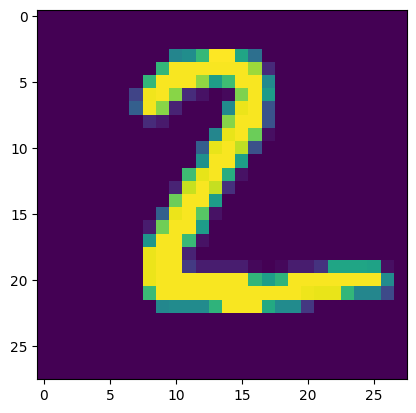

In [28]:
print(np.argmax(y_prob[1]))
plt.imshow(x_test[1])